In [1]:
%matplotlib inline
%pylab inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import xarray as xr
import copy
import cartopy.crs as ccrs
import csv
import cartopy.feature as cft
from collections import OrderedDict

from dask.distributed import Client
import climtas.nci

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Populating the interactive namespace from numpy and matplotlib
Available exptdata keys:  ['1deg_c1', '025deg_c1', '01deg_c1', '1deg_c2', '025deg_c2', '01deg_c2', '1deg_c3', '025deg_c3', '01deg_c3']


In [2]:
import climtas.nci
climtas.nci.GadiClient(malloc_trim_threshold='64kib')

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 8
Total threads: 8,Total memory: 128.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39707,Workers: 8
Dashboard: /proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 128.00 GiB
Comm: tcp://127.0.0.1:33267,Total threads: 1
Dashboard: /proxy/42741/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:38837,


In [3]:
session = cc.database.create_session()

In [4]:
data = copy.deepcopy(exptdata.exptdict) 

In [5]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight", facecolor = 'w')  # comment out to disable saving
#     plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

### Time series of SAM index (5-year averaged) # only positive and negative

In [65]:
dataset2 = pd.read_csv('5.3/SAM index(1).csv')

X2 = dataset2.iloc[:, 1].values

w = 5 

x2 = np.convolve(X2, np.ones(w), 'valid') / w

In [33]:
def time_series_SAM():
    
    plt.figure(figsize(12,8))
    
    t1 = []
    t2 = []
    t3 = []
    
    for tt in range (1,58,1):
        t1.append(tt)

    for tt in range (1,58,10):
        t2.append(tt)
        
    for tt in c:
        t3.append(tt+1)
        
    # plt.plot(t3,y2, 'r',label = 'IR_NZ 1deg')
    plt.plot(t1,x2, 'r',label = 'IR_NZ 1deg')
    
    plt.legend(loc = 'upper right')
    
                        
    plt.xticks(t2)
    plt.title('Time series of SAM index')
    plt.xlabel('every 5-year')
    plt.ylabel('(Sv)')
    plt.ylim([-30,-10])
    # plt.ylim([-15,6])
    
    plt.plot(T1, y21)
    
    
    # savefigure('time series of SAM index positive and negative only')
    savefigure('time series of SAM index')

In [80]:
T1 = np.arange(1,58)

In [81]:
trend_sam_1 = np.polyfit(T1, X2[0:57], 1)

In [82]:
y21 = trend_sam_1[1] + T1*trend_sam_1[0]

In [65]:
# c = a + b
# c.sort()

In [69]:
# y2 = []
# for x in c:
#     y2.append(x2[x])

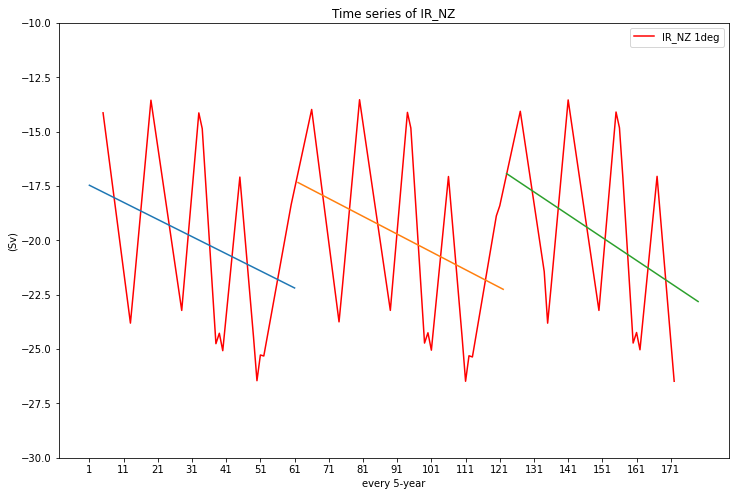

In [74]:
time_series_SAM()

### Time series of IR_NZ (5-year averaged) with SAM index

In [35]:
dataset2 = pd.read_csv('IR_NZ(1).csv')

X2 = dataset2.iloc[61:122, 1].values

w = 5 

x2 = np.convolve(X2, np.ones(w), 'valid') / w

In [28]:
dataset2 = pd.read_csv('IR_NZ_without_trend(1).csv')

X2 = dataset2.iloc[:, 1].values

w = 5 

x2 = np.convolve(X2, np.ones(w), 'valid') / w

In [36]:
def time_series_NZ():
    
    fig = plt.figure(figsize=(12,8))
    
    t1 = []
    t2 = []
    for tt in range (1,58,1):
        t1.append(tt)
    for tt in range (1,58,10):
        t2.append(tt)
    
    ax1 = fig.add_subplot(111)
    ax1.plot(t1,x2, 'r',label = 'IR_NZ 1deg')
    ax1.legend(loc = 'upper left')                       
    ax1.set_xticks(t2)
    ax1.set_title('Time series of IR_NZ and SAM index')
    ax1.set_xlabel('year')
    ax1.set_ylabel('(Sv)')
    # ax1.set_ylim([-30,-10])

    # ax1.plot(T1, y21)
    # ax1.plot(T1, y21 + x2_std)
    # ax1.plot(T1, y21 - x2_std)
    
    t3 = []
    for tt in range (1,58,1):
        t3.append(tt)
    
    ax2 = ax1.twinx()
    ax2.plot(t3,x3,'b',label = 'SAM index')
    ax2.legend(loc = 'upper right') 
    
    
    # savefigure('time series of IR_NZ_without_trend with SAM index_without_trend')
    savefigure('time series of IR_NZ with SAM index')

In [37]:
T1 = np.arange(1,58)
# T2 = np.arange(62,123)
# T3 = np.arange(123,180)

In [38]:
trend_NZ_1 = np.polyfit(T1, x2[0:57], 1)
# trend_NZ_2 = np.polyfit(T2, x2[61:122], 1)
# trend_NZ_3 = np.polyfit(T3, x2[122:179], 1)

In [39]:
y21 = trend_NZ_1[1] + T1*trend_NZ_1[0]
# y22 = trend_NZ_2[1] + T2*trend_NZ_2[0]
# y23 = trend_NZ_3[1] + T3*trend_NZ_3[0]

In [40]:
dataset3 = pd.read_csv('5.3 SAM and SLP/SAM index(1).csv')

X3 = dataset3.iloc[:, 1:].values

X3 = np.average(X3,axis = 1)

w = 5 

x3 = np.convolve(X3, np.ones(w), 'valid') / w

In [33]:
dataset3 = pd.read_csv('5.3 SAM and SLP/SAM index_without_trend(1).csv')

X3 = dataset3.iloc[:, 1:].values

X3 = np.average(X3,axis = 1)

w = 5 

x3 = np.convolve(X3, np.ones(w), 'valid') / w

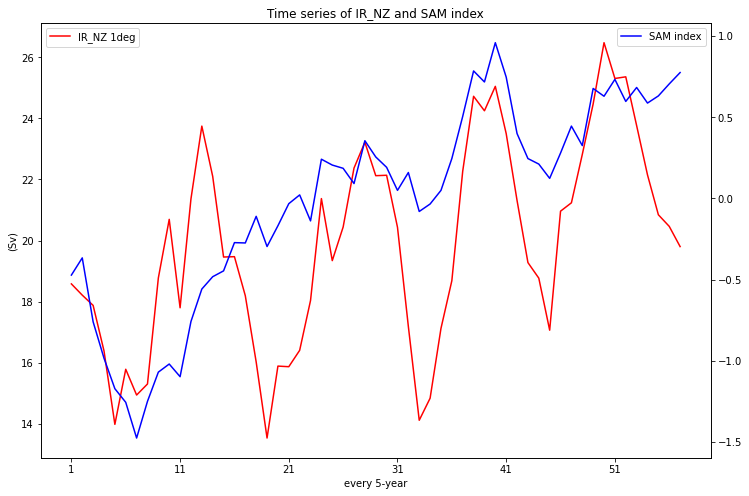

In [41]:
time_series_NZ()

### Mean and Std

In [10]:
x2_m = x2.mean()
x2_sq = x2**2       
x2_sq_m = x2_sq.mean()
x2_std = (x2_sq_m - (x2_m)**2)**0.5

In [12]:
a = []
b = []

for i in range(0,57):
    if x2[i] > y21[i]+x2_std:
        a.append(i)
    if x2[i] < y21[i]-x2_std:
        b.append(i)      

In [6]:
a1 = [4]
a2 = [18]
a3 = [32,33,34]
a4 = [44]
b1 = [11,12,13]
b2 = [27]
b3 = [37,38,39]
b4 = [49]

### PSL

In [7]:
%%time

psl = cc.querying.getvar(expt='MRI-JRA55-do-1-4-0', variable='psl', 
                          session=session, frequency='3 hourly',
                          attrs={'cell_methods': 'area: mean time: point'},
                          start_time='1957-12-31 22:30:00', 
                          end_time='2019-01-05 22:30:00').resample(time = 'M').mean('time').compute()

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.41 GiB -- Worker memory limit: 10.67 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.50 GiB -- Worker memory limit: 10.67 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.50 GiB -- Worker memory limit: 10.67 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; s

CPU times: user 7min 32s, sys: 25.6 s, total: 7min 58s
Wall time: 8min 45s


distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.51 GiB -- Worker memory limit: 10.67 GiB


### SAM index

In [8]:
psl40 = psl.sel(lat = -40, method = 'nearest').mean('lon')
psl65 = psl.sel(lat = -65, method = 'nearest').mean('lon')

In [11]:
%%time
clim1 = psl40.mean('time')
anom1 = psl40 - clim1
stdev1 = psl40.std('time')
norm1 = anom1 / stdev1

CPU times: user 0 ns, sys: 8.74 ms, total: 8.74 ms
Wall time: 45.5 ms


In [12]:
%%time
clim2 = psl65.mean('time')
anom2 = psl65 - clim2
stdev2 = psl65.std('time')
norm2 = anom2 / stdev2

CPU times: user 2.87 ms, sys: 300 µs, total: 3.17 ms
Wall time: 2.78 ms


In [13]:
SAM_index = norm1 - norm2

In [14]:
SAM = SAM_index.resample(time='A').mean('time')

In [15]:
c = []

for t in range (58,119,1):
    tstart = pd.to_datetime('1900/01/01') + pd.DateOffset(years=t)
    tend   = tstart + pd.DateOffset(years=1)

    c.append(str(tstart.year) +'-'+str(tend.year))

In [22]:
s = []

for i in range(61):
    s.append(SAM.values[i])
    
test=pd.DataFrame({'SAM index':s})

test.index = c

print(test)

round(test,2).to_csv('SAM index(1).csv')

           SAM index
1958-1959  -0.839843
1959-1960  -0.408598
1960-1961  -0.389852
1961-1962  -0.157814
1962-1963  -0.563520
...              ...
2014-2015   0.353028
2015-2016   1.236097
2016-2017   0.638739
2017-2018   0.961055
2018-2019   0.687268

[61 rows x 1 columns]


### subtract trend

In [7]:
dataset2 = pd.read_csv('3.2 IR_value/IR_NZ(1).csv')

X2 = dataset2.iloc[61:122, 1].values

In [ ]:
dataset2 = pd.read_csv('5.3/SAM index(1).csv')

X2 = dataset2.iloc[:, 1].values

In [8]:
T1 = np.arange(1,62)

In [9]:
trend_sam_1 = np.polyfit(T1, X2[0:61], 1)

In [10]:
y21 = trend_sam_1[1] + T1*trend_sam_1[0]

In [11]:
SAM_without_trend = X2-y21

In [12]:
c = []

for t in range (58,119,1):
    tstart = pd.to_datetime('1900/01/01') + pd.DateOffset(years=t)
    tend   = tstart + pd.DateOffset(years=1)

    c.append(str(tstart.year) +'-'+str(tend.year))

In [13]:
s = []

for i in range(61):
    s.append(SAM_without_trend[i])
    
# test=pd.DataFrame({'SAM index':s})
test=pd.DataFrame({'IR_NZ':s})

test.index = c

print(test)

# round(test,2).to_csv('SAM index_without_trend(1).csv')
round(test,2).to_csv('IR_NZ_without_trend(1).csv')

              IR_NZ
1958-1959  2.688562
1959-1960  0.669025
1960-1961 -2.290512
1961-1962 -8.110049
1962-1963 -0.959585
...             ...
2014-2015  5.924503
2015-2016  3.894967
2016-2017  0.955430
2017-2018  1.285893
2018-2019  1.956356

[61 rows x 1 columns]


### PSL

In [8]:
PSL = psl.resample(time='A').mean('time')

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.51 GiB -- Worker memory limit: 10.67 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.51 GiB -- Worker memory limit: 10.67 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.51 GiB -- Worker memory limit: 10.67 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; s

In [9]:
def running_average(x):

    ra = x.rolling(time=5, center=True).mean()

    return ra

In [10]:
%%time

# stack lat and lon into a single dimension called allpoints
stacked = PSL.stack(allpoints=['lat','lon'])
# apply the function over allpoints to calculate the trend at each point
Ds_x = stacked.groupby('allpoints').apply(running_average)
# unstack back to lat lon coordinates
Ds_unstacked = Ds_x.unstack('allpoints')

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.51 GiB -- Worker memory limit: 10.67 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.51 GiB -- Worker memory limit: 10.67 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.51 GiB -- Worker memory limit: 10.67 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; s

CPU times: user 4min 53s, sys: 13.2 s, total: 5min 6s
Wall time: 4min 40s


distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.52 GiB -- Worker memory limit: 10.67 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.52 GiB -- Worker memory limit: 10.67 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.52 GiB -- Worker memory limit: 10.67 GiB


In [28]:
psl_mean = Ds_unstacked.mean('time')

In [29]:
psl_mean.to_netcdf('psl_mean.nc')

In [58]:
Ax = []
Bx = []

for x in a:
    Ax.append(Ds_unstacked.isel(time=x))
    
for x in b:
    Bx.append(Ds_unstacked.isel(time=x))

In [59]:
psl_positive = xr.concat(Ax, dim="time")
psl_negative = xr.concat(Bx, dim="time")

In [60]:
psl_positive.to_netcdf('psl_positive.nc')
psl_negative.to_netcdf('psl_negative.nc')

In [11]:
Ax1 = []
Bx1 = []

for x in a1:
    Ax1.append(Ds_unstacked.isel(time=x))
    
for x in b1:
    Bx1.append(Ds_unstacked.isel(time=x))
    
psl_positive = xr.concat(Ax1, dim="time")
psl_negative = xr.concat(Bx1, dim="time")

psl_positive.to_netcdf('psl_positive1.nc')
psl_negative.to_netcdf('psl_negative1.nc')

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.52 GiB -- Worker memory limit: 10.67 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.52 GiB -- Worker memory limit: 10.67 GiB


In [12]:
Ax1 = []
Bx1 = []

for x in a2:
    Ax1.append(Ds_unstacked.isel(time=x))
    
for x in b2:
    Bx1.append(Ds_unstacked.isel(time=x))
    
psl_positive = xr.concat(Ax1, dim="time")
psl_negative = xr.concat(Bx1, dim="time")

psl_positive.to_netcdf('psl_positive2.nc')
psl_negative.to_netcdf('psl_negative2.nc')

In [13]:
Ax1 = []
Bx1 = []

for x in a3:
    Ax1.append(Ds_unstacked.isel(time=x))
    
for x in b3:
    Bx1.append(Ds_unstacked.isel(time=x))
    
psl_positive = xr.concat(Ax1, dim="time")
psl_negative = xr.concat(Bx1, dim="time")

psl_positive.to_netcdf('psl_positive3.nc')
psl_negative.to_netcdf('psl_negative3.nc')

In [14]:
Ax1 = []
Bx1 = []

for x in a4:
    Ax1.append(Ds_unstacked.isel(time=x))
    
for x in b4:
    Bx1.append(Ds_unstacked.isel(time=x))
    
psl_positive = xr.concat(Ax1, dim="time")
psl_negative = xr.concat(Bx1, dim="time")

psl_positive.to_netcdf('psl_positive4.nc')
psl_negative.to_netcdf('psl_negative4.nc')

distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.52 GiB -- Worker memory limit: 10.67 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.52 GiB -- Worker memory limit: 10.67 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 7.52 GiB -- Worker memory limit: 10.67 GiB
distributed.worker - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; s

### Map of composite

In [27]:
land_50m = cft.NaturalEarthFeature('physical', 'land', '110m',
                                        edgecolor='black',
                                        facecolor='gray',
                                        linewidth=0.5)

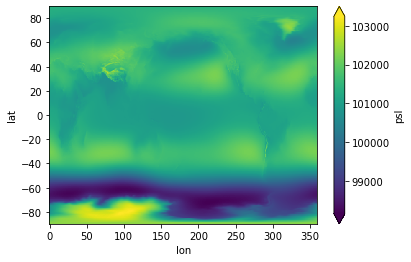

In [7]:
psl_mean = xr.open_dataarray('5.3 SAM and SLP/psl_mean.nc')

# , projection=projection
# clev = np.arange(-0.015,0.015,0.001)
# levels=clev,
psl_mean.plot(extend='both')

### positive

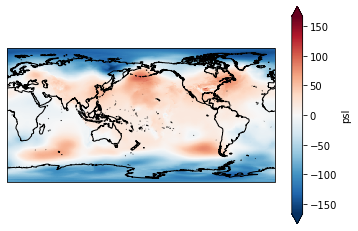

In [33]:
psl_positive = xr.open_dataarray('5.3/psl_positive.nc')

plt.figure()
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))

# # clev = np.arange(-0.015,0.015,0.001) levels=clev,
(psl_positive.mean('time') - psl_mean).plot(extend='both')

# ax.add_feature(land_50m,color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

savefigure('Map of psl positive')

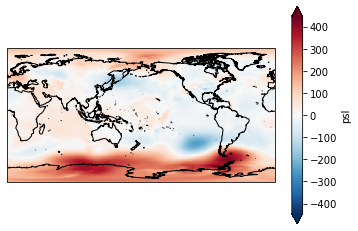

In [8]:
psl_positive1 = xr.open_dataarray('5.3 SAM and SLP/psl_positive1.nc')

plt.figure()
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))

# # clev = np.arange(-0.015,0.015,0.001) levels=clev,
(psl_positive1.mean('time') - psl_mean).plot(extend='both')

# ax.add_feature(land_50m,color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

savefigure('Map of psl positive1')

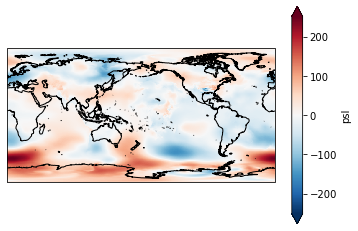

In [9]:
psl_positive1 = xr.open_dataarray('5.3 SAM and SLP/psl_positive2.nc')

plt.figure()
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))

# # clev = np.arange(-0.015,0.015,0.001) levels=clev,
(psl_positive1.mean('time') - psl_mean).plot(extend='both')

# ax.add_feature(land_50m,color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

savefigure('Map of psl positive2')

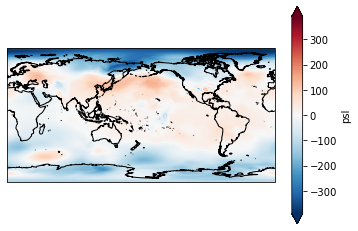

In [10]:
psl_positive1 = xr.open_dataarray('5.3 SAM and SLP/psl_positive3.nc')

plt.figure()
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))

# # clev = np.arange(-0.015,0.015,0.001) levels=clev,
(psl_positive1.mean('time') - psl_mean).plot(extend='both')

# ax.add_feature(land_50m,color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

savefigure('Map of psl positive3')

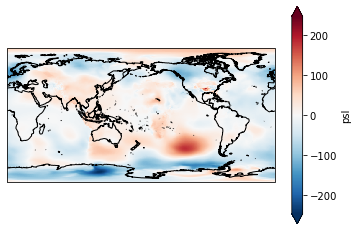

In [11]:
psl_positive1 = xr.open_dataarray('5.3 SAM and SLP/psl_positive4.nc')

plt.figure()
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))

# # clev = np.arange(-0.015,0.015,0.001) levels=clev,
(psl_positive1.mean('time') - psl_mean).plot(extend='both')

# ax.add_feature(land_50m,color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

savefigure('Map of psl positive4')

### negative

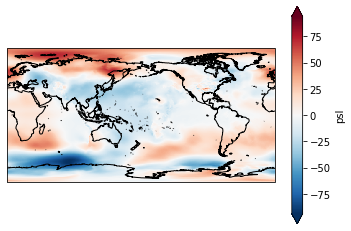

In [34]:
psl_negative = xr.open_dataarray('5.3/psl_negative.nc')

plt.figure()
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))

# levels=clev,
(psl_negative.mean('time') - psl_mean).plot(extend='both')

# ax.add_feature(land_50m,color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

savefigure('Map of psl negative')

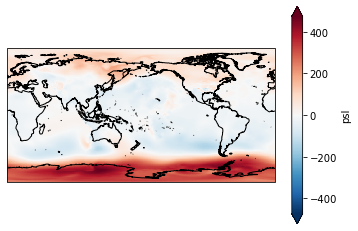

In [13]:
psl_negative1 = xr.open_dataarray('5.3 SAM and SLP/psl_negative1.nc')

plt.figure()
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))

# levels=clev,
(psl_negative1.mean('time') - psl_mean).plot(extend='both')

# ax.add_feature(land_50m,color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

savefigure('Map of psl negative1')

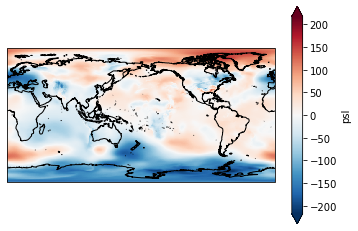

In [14]:
psl_negative1 = xr.open_dataarray('5.3 SAM and SLP/psl_negative2.nc')

plt.figure()
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))

# levels=clev,
(psl_negative1.mean('time') - psl_mean).plot(extend='both')

# ax.add_feature(land_50m,color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

savefigure('Map of psl negative2')

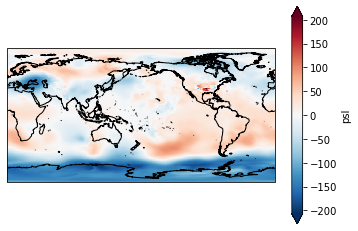

In [15]:
psl_negative1 = xr.open_dataarray('5.3 SAM and SLP/psl_negative3.nc')

plt.figure()
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))

# levels=clev,
(psl_negative1.mean('time') - psl_mean).plot(extend='both')

# ax.add_feature(land_50m,color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

savefigure('Map of psl negative3')

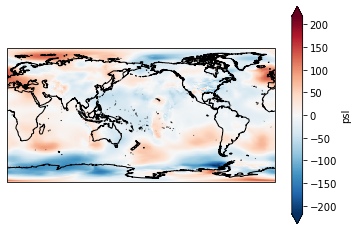

In [16]:
psl_negative1 = xr.open_dataarray('5.3 SAM and SLP/psl_negative4.nc')

plt.figure()
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=180))

# levels=clev,
(psl_negative1.mean('time') - psl_mean).plot(extend='both')

# ax.add_feature(land_50m,color=[0.8, 0.8, 0.8])
ax.coastlines(resolution='50m')

savefigure('Map of psl negative4')